In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import math 

In [3]:
df = pd.read_csv('dep_clean (1).csv')

In [17]:
df.head()

,1.Gender,2.level,3. job,4.Age,5. marrid,6. child,7.sport,8.music,9.Faith,10.Travel,11.mali,dep
0,0,3,0,32,0,0,0,2,0,0,1,2
1,0,3,0,34,0,0,0,2,0,0,2,2
2,0,3,1,28,0,0,0,2,0,0,1,2
3,0,3,0,45,0,1,0,2,0,0,2,2
4,0,0,0,45,0,0,0,2,0,0,1,2


<Axes: >

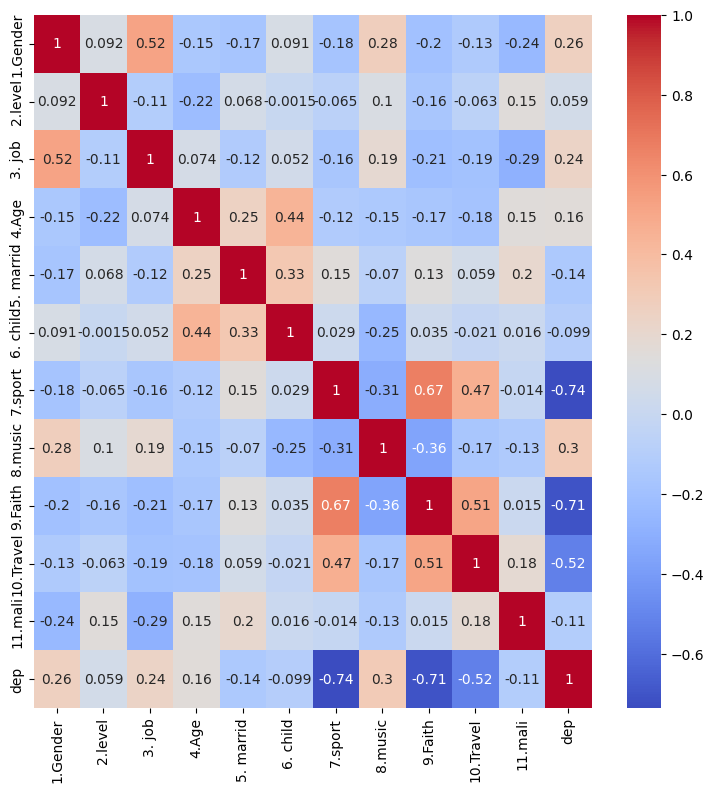

In [5]:
plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

In [6]:
x = df.drop("dep", axis=1)
y = df.dep

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
model = Sequential()
model.add(Dense(64, input_dim=11, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2947 (11.51 KB)
Trainable params: 2947 (11.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=200, batch_size=10)

Epoch 1/200


C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


26/32 [=======================>......] - ETA: 0s - loss: 2.2191 - accuracy: 0.3154

C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 [==============================] - 9s 24ms/step - loss: 2.0208 - accuracy: 0.3323 - val_loss: 1.0761 - val_accuracy: 0.4625
Epoch 2/200
32/32 [==============================] - 0s 8ms/step - loss: 1.0016 - accuracy: 0.5141 - val_loss: 0.8163 - val_accuracy: 0.7375
Epoch 3/200
32/32 [==============================] - 0s 7ms/step - loss: 0.8387 - accuracy: 0.6740 - val_loss: 0.8197 - val_accuracy: 0.6125
Epoch 4/200
32/32 [==============================] - 0s 6ms/step - loss: 0.7622 - accuracy: 0.6552 - val_loss: 0.6466 - val_accuracy: 0.7500
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.6928 - val_loss: 0.6524 - val_accuracy: 0.6625
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6353 - accuracy: 0.7367 - val_loss: 0.5566 - val_accuracy: 0.8000
Epoch 7/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6102 - accuracy: 0.7398 - val_loss: 0.5333 - val_accuracy: 0.8250
Epoch 8/200
32/32 [=====

In [13]:
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

10/10 [==============================] - 0s 6ms/step - loss: 0.2507 - accuracy: 0.8966
Training Accuracy: 89.66%

3/3 [==============================] - 0s 5ms/step - loss: 0.4749 - accuracy: 0.8000
Testing Accuracy: 80.00%



In [14]:
man = np.array([[1,3,3,33,0,0,2,1,2,2,2]])
out=model.predict(man)
h=np.array(out[0])
bars = ('low', 'medium', 'high')

1/1 [==============================] - 0s 38ms/step


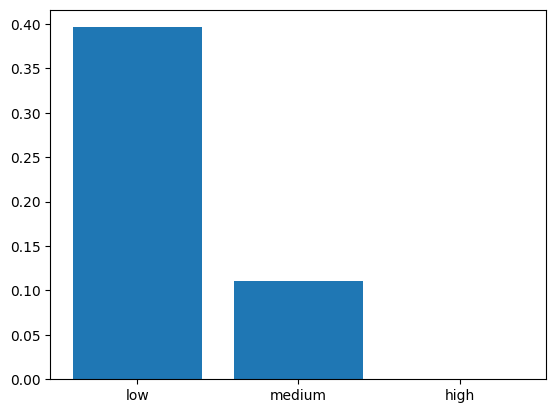

In [15]:
plt.bar(bars, h)
plt.show()

In [16]:
model.save('mental_prediction')
print('DONE!')

INFO:tensorflow:Assets written to: mental_prediction\assets


INFO:tensorflow:Assets written to: mental_prediction\assets


DONE!
